#DATA CLEANING & PREPROCESSING

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Social Media Data for DSBA.csv')
#Glimpse of Data
df.head()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6


In [ ]:
# Shape of Data
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 11760 
The number of columns (variables) is 17


In [ ]:
# Null & Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [ ]:
# Description of dataset
df.describe()

,UserID,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,1.176000e+04,11179.000000,11379.000000,11554.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,1.005880e+06,280.830844,28170.481765,74.790029,6531.699065,3.203571,28.661565,2.712245,0.793878,13.817432
std,3.394964e+03,68.182958,14385.032134,24.026650,4706.613785,2.616365,48.660504,1.080887,0.851823,9.070657
min,1.000001e+06,35.000000,3570.000000,3.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,1.002941e+06,232.000000,16380.000000,57.000000,2940.750000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,1.005880e+06,271.000000,28076.000000,75.000000,4948.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,1.008820e+06,324.000000,40525.000000,92.000000,8393.250000,5.000000,27.000000,4.000000,1.000000,18.000000
max,1.011760e+06,464.000000,252430.000000,815.000000,20065.000000,11.000000,500.000000,4.000000,3.000000,270.000000


In [ ]:
# Null Variables
df.isnull().sum()

UserID                                            0
Taken_product                                     0
Yearly_avg_view_on_travel_page                  581
preferred_device                                 53
total_likes_on_outstation_checkin_given         381
yearly_avg_Outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
Yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
Adult_flag                                        0
Daily_Avg_mins_spend_on_traveling_page            0
dtype: int64

In [ ]:
df = df.drop(columns=['UserID'])

In [ ]:
# Impute categorical variables with mode
categorical_columns = df.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Impute numerical variables with mean
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [ ]:
# Null Variables imputed
df.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [ ]:
# Define a function to treat outliers using IQR
def treat_outliers_iqr(df, column):
    # Calculate the first and third quartiles (Q1 and Q3)
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR
      df[column] = df[column].where((df[column] >= lower_bound) & (df[column] <= upper_bound))
for column in numerical_columns:
    treat_outliers_iqr(df, column)

In [ ]:
df.describe()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
count,11731.000000,11756.000000,11720.000000,10844.000000,11760.000000,11518.000000,11760.000000,11080.000000,11410.000000
mean,280.712703,28119.689993,74.837265,5527.435540,3.203571,22.452162,2.712245,0.658484,13.039614
std,65.810879,13858.918851,21.169813,3312.607616,2.616365,6.881898,1.080887,0.673114,7.333545
min,135.000000,3570.000000,31.000000,1009.000000,0.000000,11.000000,1.000000,0.000000,0.000000
25%,233.000000,16695.000000,58.000000,2845.000000,1.000000,17.000000,2.000000,0.000000,8.000000
50%,275.000000,28170.481765,74.790029,4668.000000,3.000000,22.000000,3.000000,1.000000,12.000000
75%,321.000000,40111.250000,92.000000,6844.000000,5.000000,27.000000,4.000000,1.000000,17.000000
max,455.000000,52512.000000,125.000000,16567.000000,11.000000,42.000000,4.000000,2.000000,33.000000


In [ ]:
# renaming variables
df = df.rename(columns={'Yearly_avg_view_on_travel_page': 'yearly_avg_Views'})
df = df.rename(columns={'total_likes_on_outstation_checkin_given': 'total_likes_checkin'})
df = df.rename(columns={'yearly_avg_Outstation_checkins': 'yearly_avg_checkins'})
df = df.rename(columns={'Yearly_avg_comment_on_travel_page': 'yearly_avg_Comments'})
df = df.rename(columns={'total_likes_on_outofstation_checkin_received': 'total_likes_user_outofstation'})
df = df.rename(columns={'week_since_last_outstation_checkin': 'week_since_checkin'})
df = df.rename(columns={'montly_avg_comment_on_company_page': 'monthly_avg_comments'})
df = df.rename(columns={'Daily_Avg_mins_spend_on_traveling_page': 'daily_avg_mins_travel_page'})
df = df.rename(columns={'Taken_product': 'Buy_Ticket'})

In [ ]:
# Null & Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Buy_Ticket                     11760 non-null  object 
 1   yearly_avg_Views               11731 non-null  float64
 2   preferred_device               11760 non-null  object 
 3   total_likes_checkin            11756 non-null  float64
 4   yearly_avg_checkins            11760 non-null  object 
 5   member_in_family               11760 non-null  object 
 6   preferred_location_type        11760 non-null  object 
 7   yearly_avg_Comments            11720 non-null  float64
 8   total_likes_user_outofstation  10844 non-null  float64
 9   week_since_checkin             11760 non-null  int64  
 10  following_company_page         11760 non-null  object 
 11  monthly_avg_comments           11518 non-null  float64
 12  working_flag                   11760 non-null 

In [ ]:
#Logical changes
df["preferred_device"].value_counts()

Tab                4225
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
Other                 2
Others                2
Name: preferred_device, dtype: int64

In [ ]:
df["preferred_device"]=df["preferred_device"].replace('Tab', 'Mobile')
df["preferred_device"]=df["preferred_device"].replace('iOS and Android', 'Mobile')
df["preferred_device"]=df["preferred_device"].replace('iOS', 'Mobile')
df["preferred_device"]=df["preferred_device"].replace('Android', 'Mobile')
df["preferred_device"]=df["preferred_device"].replace('Android OS', 'Mobile')
df["preferred_device"]=df["preferred_device"].replace('ANDROID', 'Mobile')
df["preferred_device"]=df["preferred_device"].replace('Other', 'Mobile')
df["preferred_device"]=df["preferred_device"].replace('Others', 'Mobile')

In [ ]:
#Logical changes
df["preferred_device"].value_counts()

Mobile    10652
Laptop     1108
Name: preferred_device, dtype: int64

In [ ]:
df["yearly_avg_checkins"].value_counts()

1     4618
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
29     215
23     215
18     208
15     206
26     199
20     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
*        1
Name: yearly_avg_checkins, dtype: int64

In [ ]:
df["yearly_avg_checkins"]=df["yearly_avg_checkins"].replace('*', '1')

In [ ]:
#Logical changes
df["yearly_avg_checkins"].value_counts()

1     4619
2      844
10     682
9      340
7      336
3      336
8      320
5      261
4      256
16     255
6      236
11     229
24     223
23     215
29     215
18     208
15     206
20     199
26     199
25     198
28     180
19     176
14     167
17     160
12     159
22     152
13     150
21     143
27      96
Name: yearly_avg_checkins, dtype: int64

In [ ]:
df["member_in_family"].value_counts()

3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

In [ ]:
df["member_in_family"]=df["member_in_family"].replace('Three', '3')

In [ ]:
#Logical changes
df["member_in_family"].value_counts()

3     4576
4     3184
2     2256
1     1349
5      384
10      11
Name: member_in_family, dtype: int64

In [ ]:
df["following_company_page"].value_counts()

No     8458
Yes    3285
1        12
0         5
Name: following_company_page, dtype: int64

In [ ]:
#Logical changes
df["following_company_page"]=df["following_company_page"].replace('1', 'Yes')
df["following_company_page"]=df["following_company_page"].replace('0', 'No')
df["following_company_page"].value_counts()

No     8463
Yes    3297
Name: following_company_page, dtype: int64

In [ ]:
df["Adult_flag"] = df["Adult_flag"].astype(str)
df["Adult_flag"] = df["Adult_flag"].str.strip()
print(df["Adult_flag"].unique())

['0.0' '1.0' 'nan' '2.0']


In [ ]:
df["Adult_flag"]=df["Adult_flag"].replace('2.0', '1.0')
df["Adult_flag"]=df["Adult_flag"].replace('0.6584837545126354', '1.0')
# Print value counts for debugging
print(df["Adult_flag"].value_counts())

1.0    6032
0.0    5048
nan     680
Name: Adult_flag, dtype: int64


# EXPLORATORY DATA ANALYSIS


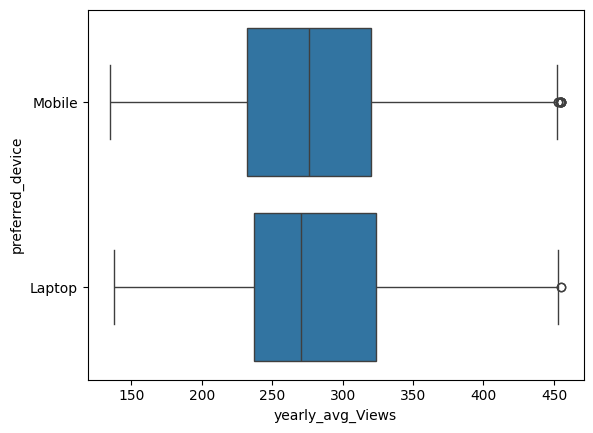

In [ ]:
sns.boxplot(x=df['yearly_avg_Views'], y=df['preferred_device'])
plt.show()

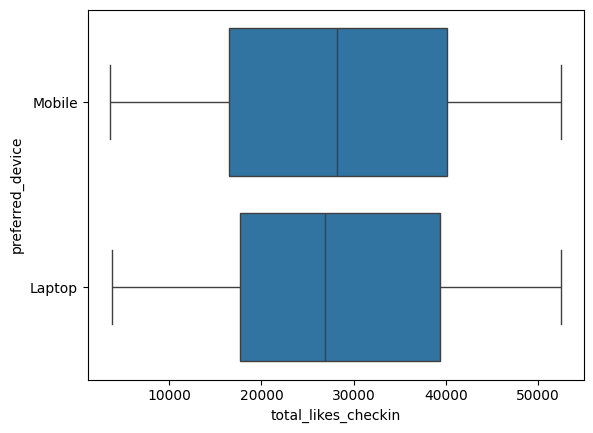

In [ ]:
sns.boxplot(x=df['total_likes_checkin'], y=df['preferred_device'])
plt.show()

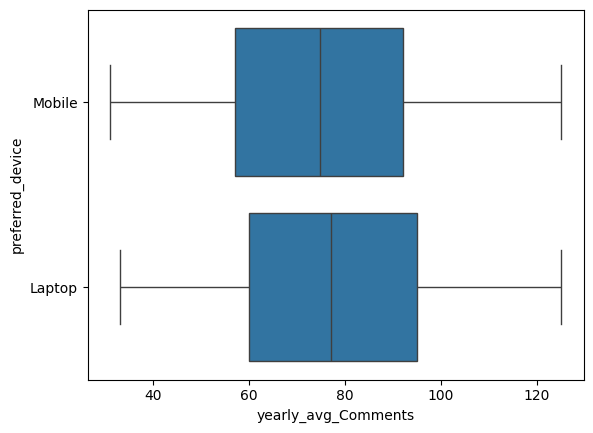

In [ ]:
sns.boxplot(x=df['yearly_avg_Comments'], y=df['preferred_device'])
plt.show()

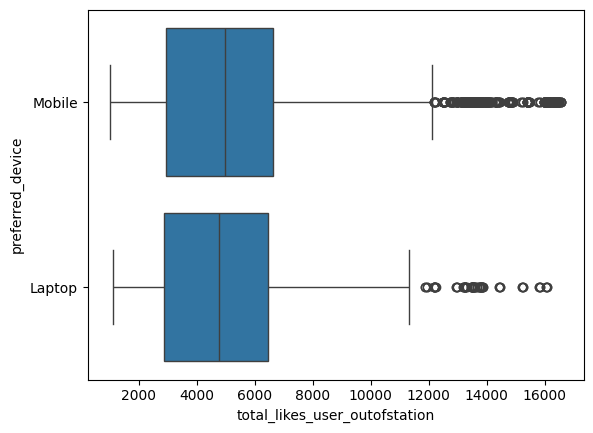

In [ ]:
sns.boxplot(x=df['total_likes_user_outofstation'], y=df['preferred_device'])
plt.show()

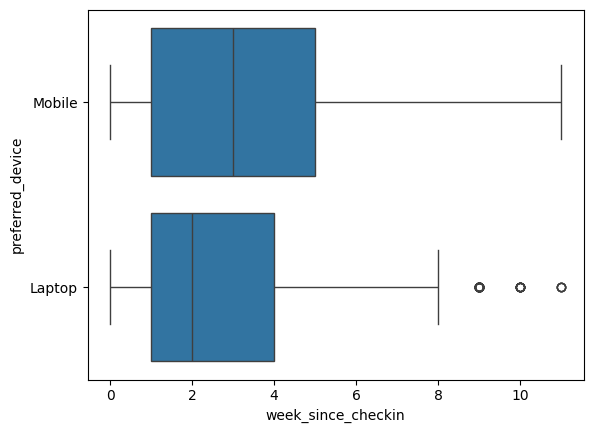

In [ ]:
sns.boxplot(x=df['week_since_checkin'], y=df['preferred_device'])
plt.show()

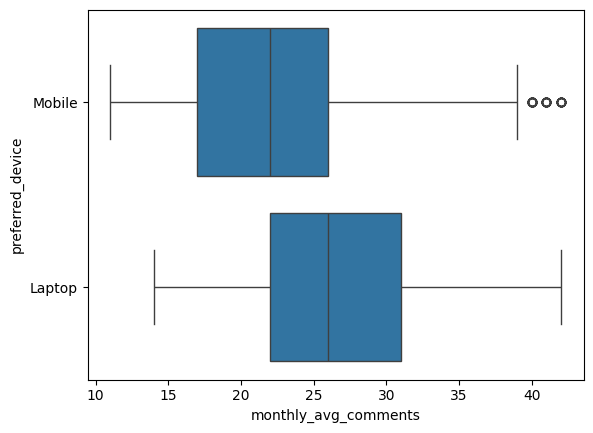

In [ ]:
sns.boxplot(x=df['monthly_avg_comments'], y=df['preferred_device'])
plt.show()

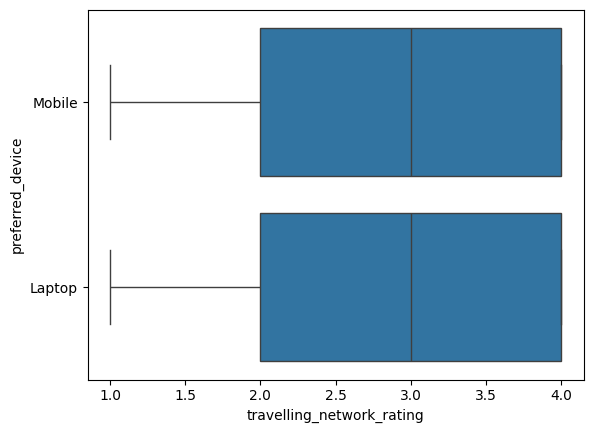

In [ ]:
sns.boxplot(x=df['travelling_network_rating'], y=df['preferred_device'])
plt.show()

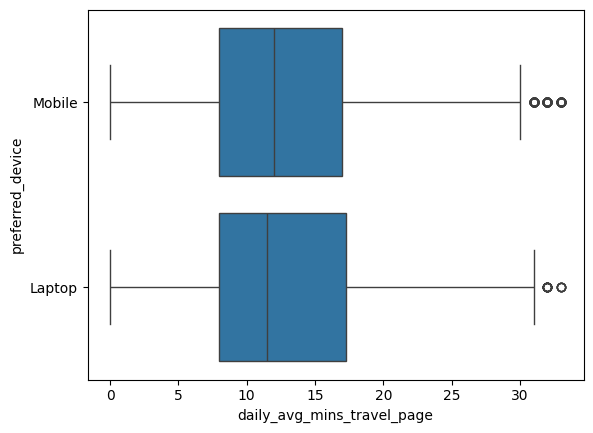

In [ ]:
sns.boxplot(x=df['daily_avg_mins_travel_page'], y=df['preferred_device'])
plt.show()

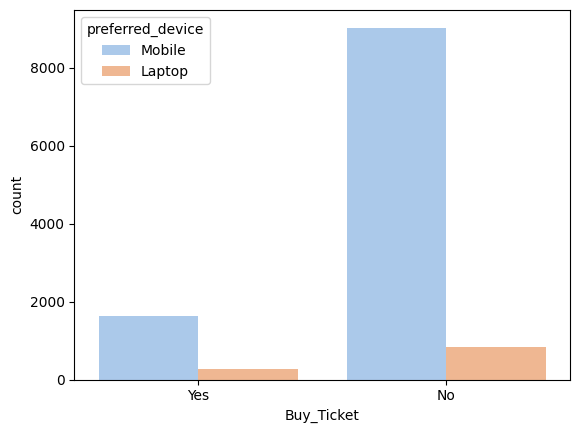

In [ ]:
sns.countplot(x=df['Buy_Ticket'], hue=df['preferred_device'], palette='pastel')
plt.show()

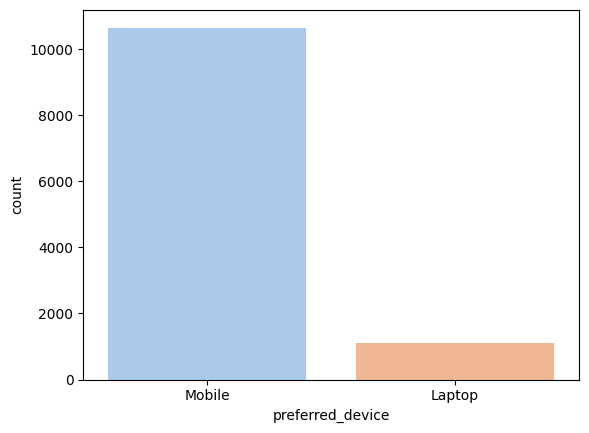

In [ ]:
sns.countplot(x= df["preferred_device"], palette='pastel')
plt.show()

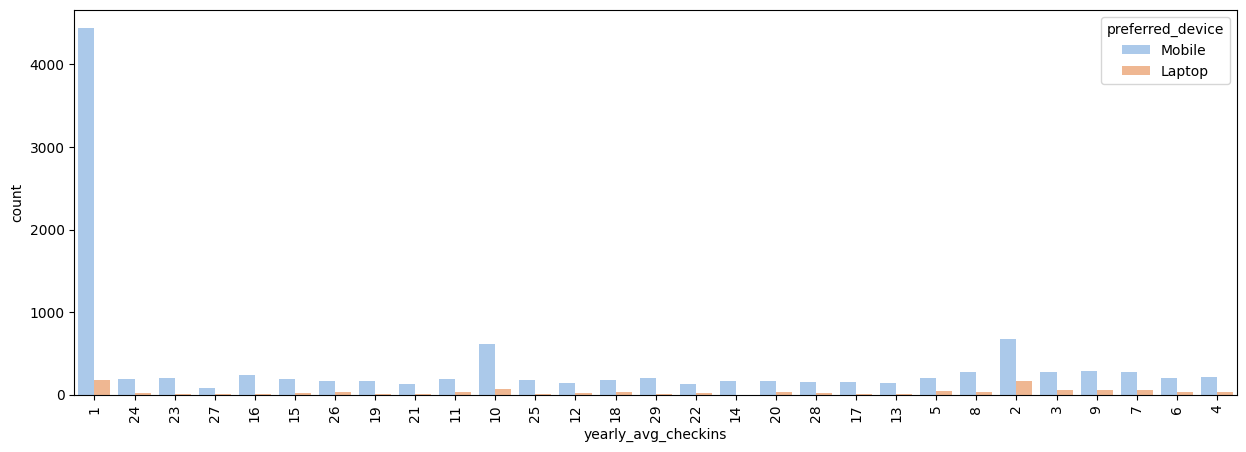

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['yearly_avg_checkins'], hue=df['preferred_device'], palette='pastel')
plt.xticks(rotation=90)
plt.show()

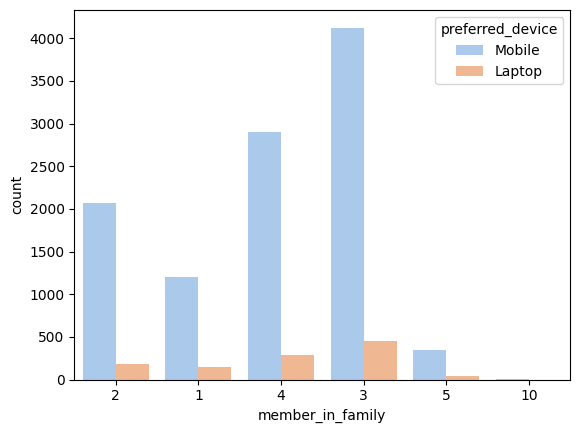

In [ ]:
sns.countplot(x=df['member_in_family'], hue=df['preferred_device'], palette='pastel')
plt.show()

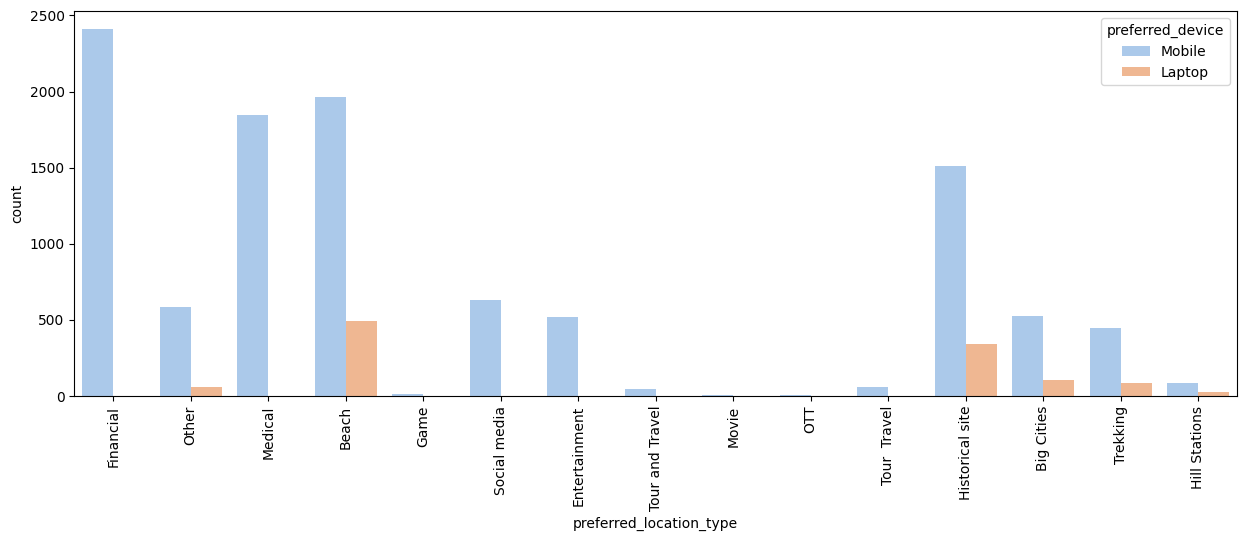

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot(x=df['preferred_location_type'], hue=df['preferred_device'], palette='pastel')
plt.xticks(rotation=90)
plt.show()

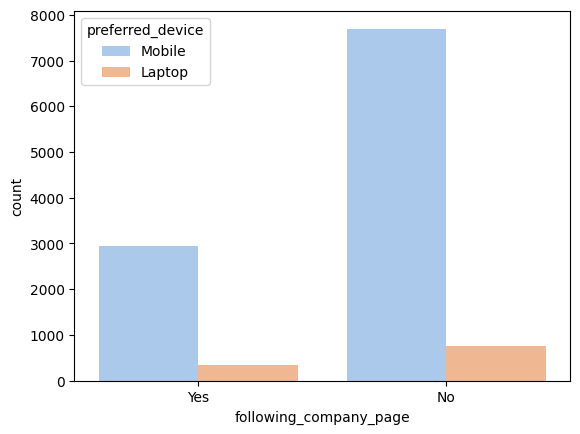

In [ ]:
sns.countplot(x=df['following_company_page'], hue=df['preferred_device'], palette='pastel')
plt.show()

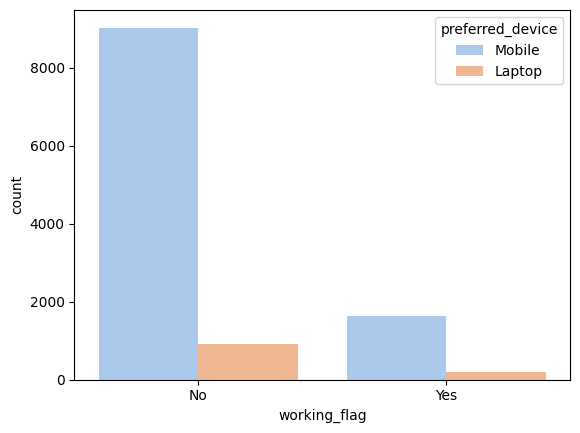

In [ ]:
sns.countplot(x=df['working_flag'], hue=df['preferred_device'], palette='pastel')
plt.show()

<Figure size 1500x800 with 0 Axes>

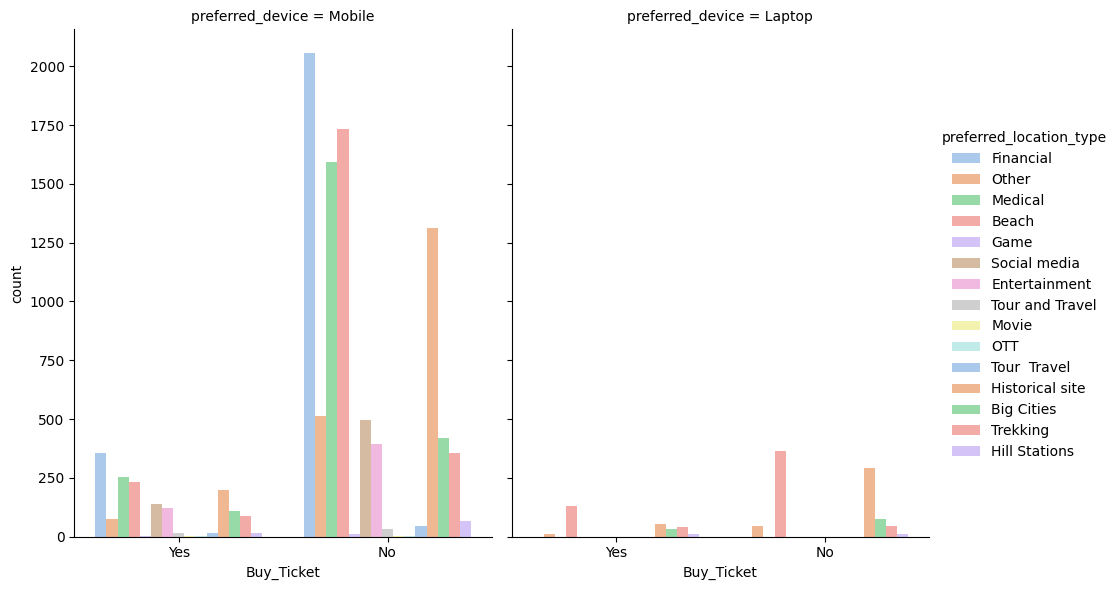

In [ ]:
plt.figure(figsize=(15, 8))
# Create subplots for each 'preferred_device'
sns.catplot(x='Buy_Ticket', hue='preferred_location_type', col='preferred_device', data=df, kind='count', palette='pastel', height=6, aspect=0.8)
plt.show()

<Figure size 1400x600 with 0 Axes>

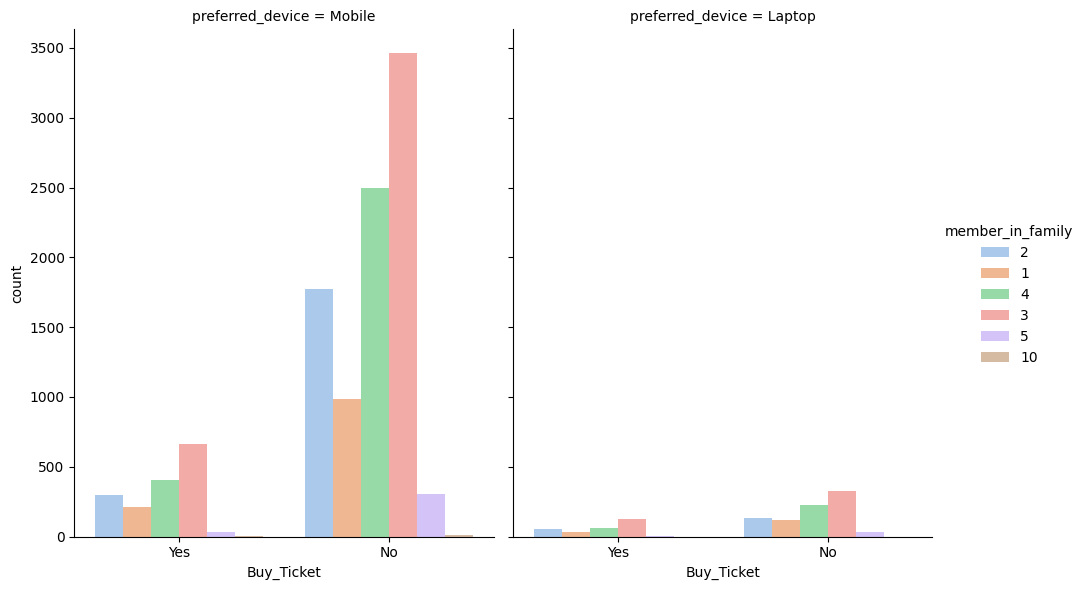

In [ ]:
plt.figure(figsize=(14, 6))  # Set the figure size

# Create subplots for each 'preferred_device'
sns.catplot(x='Buy_Ticket', hue='member_in_family', col='preferred_device', data=df, kind='count', palette='pastel', height=6, aspect=0.8)

plt.show()

# LOGISTIC REGRESSION

In [ ]:
df['preferred_device'] = df['preferred_device'].str.strip().str.lower()
mdf = df[df['preferred_device'] == 'mobile']
ldf = df[df['preferred_device'] == 'laptop']

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

#LOGISTIC REGRESSION - MOBILE

In [ ]:
X = mdf.drop(['Buy_Ticket', 'preferred_device'], axis=1)
y = mdf['Buy_Ticket']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify= mdf['Buy_Ticket'])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=mdf['Buy_Ticket'])

# Identify categorical and numerical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),  # Use 'mean' or 'median' based on your preference
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        solver='newton-cg',
        max_iter=100,
        penalty='none',
        verbose=True,
        n_jobs=2
    ))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.8708
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.98      0.93      2710
         Yes       0.70      0.26      0.38       486

    accuracy                           0.87      3196
   macro avg       0.79      0.62      0.65      3196
weighted avg       0.85      0.87      0.84      3196



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Penalty term (L1 or L2)
}

# Create a new logistic regression model
logreg_model = LogisticRegression(
    solver='newton-cg',
    max_iter=100,
    penalty='none',
    verbose=True,
    n_jobs=2
)

# Update your pipeline with the classifier name
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)  # Use the instantiated model
])

# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print the training set classification report
y_train_pred = grid_search.predict(X_train)
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Print the test set classification report
y_test_pred = grid_search.predict(X_test)
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Training Set Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.98      0.93      6322
         Yes       0.73      0.28      0.41      1134

    accuracy                           0.88      7456
   macro avg       0.81      0.63      0.67      7456
weighted avg       0.86      0.88      0.85      7456


Test Set Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.98      0.93      2710
         Yes       0.70      0.26      0.37       486

    accuracy                           0.87      3196
   macro avg       0.79      0.62      0.65      3196
weighted avg       0.85      0.87      0.84      3196



In [ ]:
# Access the coefficients (feature importance)
coefficients = model.named_steps['classifier'].coef_[0]

# Access the feature names after preprocessing
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame to display coefficients with their corresponding feature names
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Print the top 10 positive coefficients
top_positive_coefficients = feature_importance_df.nlargest(25, 'Coefficient')
print(top_positive_coefficients)

                            Feature  Coefficient
52   cat__preferred_location_type_9     2.212569
24      cat__yearly_avg_checkins_24     1.228622
22      cat__yearly_avg_checkins_22     1.104896
59    cat__following_company_page_1     1.017080
27      cat__yearly_avg_checkins_27     0.887853
62              cat__Adult_flag_0.0     0.810733
12      cat__yearly_avg_checkins_13     0.798247
16      cat__yearly_avg_checkins_17     0.603310
14      cat__yearly_avg_checkins_15     0.583912
49   cat__preferred_location_type_6     0.464106
11      cat__yearly_avg_checkins_12     0.429907
40          cat__member_in_family_3     0.404893
50   cat__preferred_location_type_7     0.379217
48   cat__preferred_location_type_5     0.367570
53  cat__preferred_location_type_10     0.311049
56  cat__preferred_location_type_13     0.308425
41          cat__member_in_family_4     0.305999
29      cat__yearly_avg_checkins_29     0.299339
39          cat__member_in_family_2     0.280770
37          cat__mem

In [ ]:
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Predict on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Display the results
print("Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print("Classification Report:\n", classification_rep_train)

Test Set:
Accuracy: 0.8708
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.98      0.93      2710
         Yes       0.70      0.26      0.38       486

    accuracy                           0.87      3196
   macro avg       0.79      0.62      0.65      3196
weighted avg       0.85      0.87      0.84      3196


Training Set:
Accuracy: 0.8754
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.98      0.93      6322
         Yes       0.73      0.29      0.41      1134

    accuracy                           0.88      7456
   macro avg       0.81      0.63      0.67      7456
weighted avg       0.86      0.88      0.85      7456



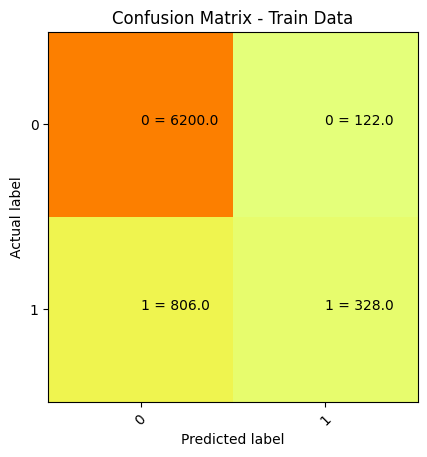

In [ ]:
y_pred_train = model.predict(X_train)

# Create the confusion matrix
cm = metrics.confusion_matrix(y_train, y_pred_train, sample_weight=np.ones(len(y_train)))

# Plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{classNames[i]} = {cm[i, j]}")

plt.show()

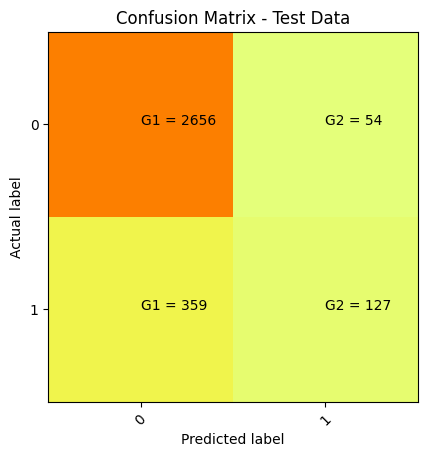

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

AUC: 0.814


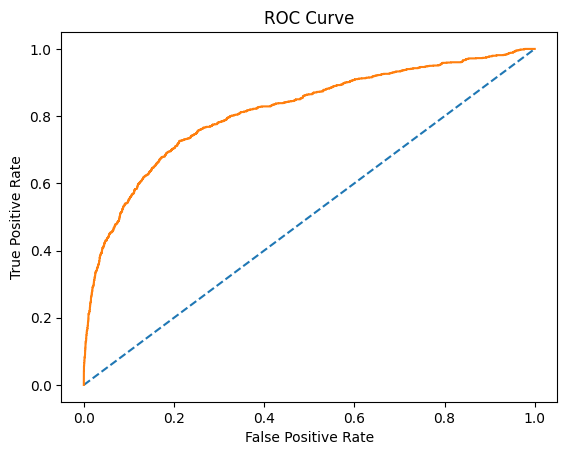

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
probs = model.predict_proba(X_train)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs, pos_label='Yes')

# Plot the ROC curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

AUC: 0.787


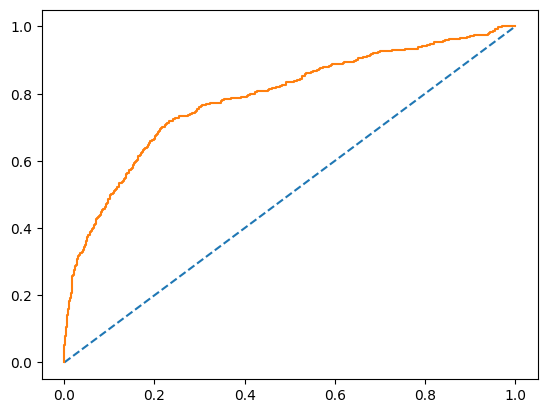

In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)  # Fix the variable name here
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs, pos_label='Yes')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for preprocessing
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

# Create the pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid
param_dist = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate the model with the best parameters on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 20}
Accuracy on Test Set: 0.9765331664580726


In [ ]:
classification_rep = classification_report(y_test, y_pred)
# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9765
Classification Report:
               precision    recall  f1-score   support

          No       0.97      1.00      0.99      2743
         Yes       1.00      0.84      0.91       453

    accuracy                           0.98      3196
   macro avg       0.99      0.92      0.95      3196
weighted avg       0.98      0.98      0.98      3196



#LOGISTIC REGRESSION - LAPTOP

In [ ]:
X = ldf.drop(['Buy_Ticket', 'preferred_device'], axis=1)
y = ldf['Buy_Ticket']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify= ldf['Buy_Ticket'])

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=ldf['Buy_Ticket'])

# Identify categorical and numerical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),  # Use 'mean' or 'median' based on your preference
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        solver='newton-cg',
        max_iter=100,
        penalty='none',
        verbose=True,
        n_jobs=2
    ))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 0.8589
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91       250
         Yes       0.79      0.59      0.68        83

    accuracy                           0.86       333
   macro avg       0.83      0.77      0.79       333
weighted avg       0.85      0.86      0.85       333



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],  # Penalty term (L1 or L2)
}

# Create a new logistic regression model
logreg_model = LogisticRegression(
    solver='newton-cg',
    max_iter=100,
    penalty='none',
    verbose=True,
    n_jobs=2
)

# Update your pipeline with the classifier name
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', logreg_model)  # Use the instantiated model
])

# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print the training set classification report
y_train_pred = grid_search.predict(X_train)
print("Training Set Classification Report:")
print(classification_report(y_train, y_train_pred))

# Print the test set classification report
y_test_pred = grid_search.predict(X_test)
print("\nTest Set Classification Report:")
print(classification_report(y_test, y_test_pred))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Best Hyperparameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Training Set Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.91       582
         Yes       0.85      0.55      0.67       193

    accuracy                           0.86       775
   macro avg       0.86      0.76      0.79       775
weighted avg       0.86      0.86      0.85       775


Test Set Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.97      0.91       250
         Yes       0.84      0.52      0.64        83

    accuracy                           0.86       333
   macro avg       0.85      0.74      0.78       333
weighted avg       0.85      0.86      0.84       333



In [ ]:
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Predict on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Display the results
print("Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print("Classification Report:\n", classification_rep_train)

Test Set:
Accuracy: 0.8589
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.95      0.91       250
         Yes       0.79      0.59      0.68        83

    accuracy                           0.86       333
   macro avg       0.83      0.77      0.79       333
weighted avg       0.85      0.86      0.85       333


Training Set:
Accuracy: 0.8606
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.96      0.91       582
         Yes       0.82      0.56      0.67       193

    accuracy                           0.86       775
   macro avg       0.84      0.76      0.79       775
weighted avg       0.86      0.86      0.85       775



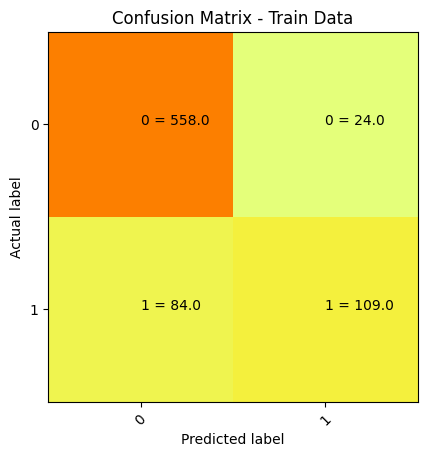

In [ ]:
y_pred_train = model.predict(X_train)

# Create the confusion matrix
cm = metrics.confusion_matrix(y_train, y_pred_train, sample_weight=np.ones(len(y_train)))

# Plot the confusion matrix
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{classNames[i]} = {cm[i, j]}")

plt.show()

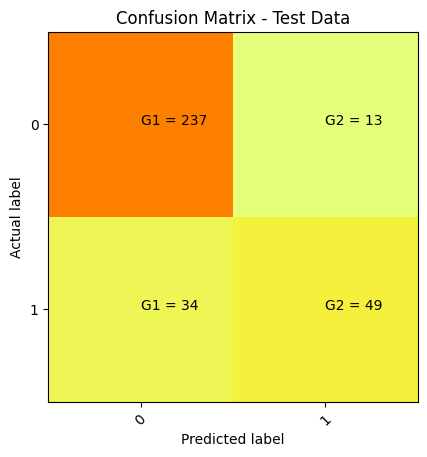

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['0', '1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

AUC: 0.895


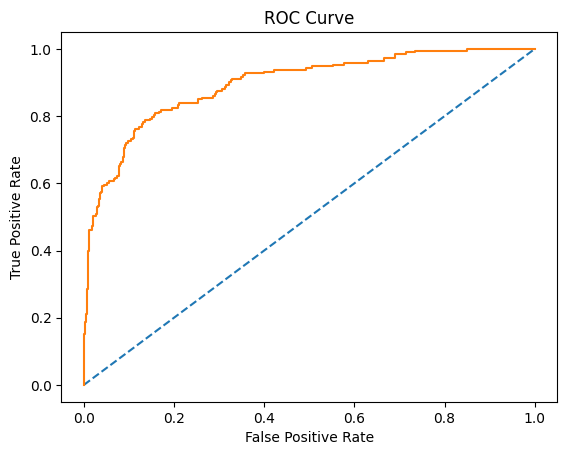

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
probs = model.predict_proba(X_train)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs, pos_label='Yes')

# Plot the ROC curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

AUC: 0.867


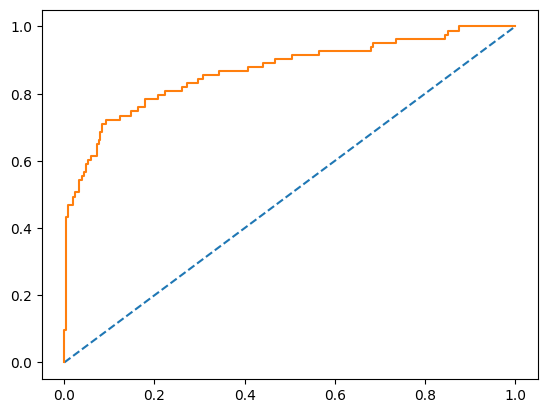

In [ ]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)  # Fix the variable name here
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs, pos_label='Yes')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

# KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

#KNN - MOBILE

In [ ]:
knn_df= df

In [ ]:
knn_df['preferred_device'] = df['preferred_device'].str.strip().str.lower()
knn_mdf = knn_df[knn_df['preferred_device'] == 'mobile']
knn_ldf = knn_df[knn_df['preferred_device'] == 'laptop']

In [ ]:
X = knn_mdf.drop(['Buy_Ticket', 'preferred_device'], axis=1)
y = mdf['Buy_Ticket']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify= mdf['Buy_Ticket'])

In [ ]:
knn_df['preferred_device'].replace({'Mobile':'0', 'Laptop':'1'}, inplace=True)
knn_df['preferred_location_type'].replace({'Financial': 0,'Other': 1,'Medical': 2, 'Beach': 3, 'Game': 4, 'Social media': 5, 'Entertainment': 6,'Tour and Travel': 7, 'Movie': 8, 'OTT': 9, 'Tour  Travel': 10, 'Historical site': 11, 'Big Cities': 12, 'Trekking': 13, 'Hill Stations': 14}, inplace=True)
knn_df['following_company_page'].replace({'Yes':'1', 'No':'0'}, inplace=True)
knn_df['working_flag'].replace({'Yes':'1', 'No':'0'}, inplace=True)
knn_df['Adult_flag'].replace({'Yes':'1', 'No':'0'}, inplace=True)

In [ ]:
# Impute categorical variables with mode
categorical_columns = knn_mdf.select_dtypes(include='object').columns
knn_mdf[categorical_columns] = knn_mdf[categorical_columns].fillna(knn_mdf[categorical_columns].mode().iloc[0])

# Impute numerical variables with mean
numerical_columns = knn_mdf.select_dtypes(include='number').columns
knn_mdf[numerical_columns] = knn_mdf[numerical_columns].fillna(knn_mdf[numerical_columns].mean())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=mdf['Buy_Ticket'])

# Identify categorical and numerical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create the KNN model with the preprocessing step
knn_model = KNeighborsClassifier(n_neighbors=5)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', knn_model)])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Predict on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Display the results
print("Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print("Classification Report:\n", classification_rep_train)


Test Set:
Accuracy: 0.9706
Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.99      0.98      2710
         Yes       0.93      0.87      0.90       486

    accuracy                           0.97      3196
   macro avg       0.95      0.93      0.94      3196
weighted avg       0.97      0.97      0.97      3196


Training Set:
Accuracy: 0.9848
Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      0.99      6322
         Yes       0.98      0.92      0.95      1134

    accuracy                           0.98      7456
   macro avg       0.98      0.96      0.97      7456
weighted avg       0.98      0.98      0.98      7456



In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Test Set
cm_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix - Test Set:")
print(cm_test)

# Confusion Matrix for Training Set
cm_train = confusion_matrix(y_train, y_pred_train)
print("\nConfusion Matrix - Training Set:")
print(cm_train)



Confusion Matrix - Test Set:
[[2678   32]
 [  62  424]]

Confusion Matrix - Training Set:
[[6297   25]
 [  88 1046]]


In [ ]:
# Assuming knn_df is your DataFrame
feature_labels = X_test.columns

# Print the feature labels
print("Feature Labels:", feature_labels)

Feature Labels: Index(['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_checkins',
       'member_in_family', 'preferred_location_type', 'yearly_avg_Comments',
       'total_likes_user_outofstation', 'week_since_checkin',
       'following_company_page', 'monthly_avg_comments', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'daily_avg_mins_travel_page'],
      dtype='object')


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'NaN' with the actual column names in your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a ColumnTransformer to apply SimpleImputer to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and KNeighborsClassifier
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

# Assuming X_test_scaled is your NumPy array
X_test_df = pd.DataFrame(X_test, columns= ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_checkins',
       'member_in_family', 'preferred_location_type', 'yearly_avg_Comments',
       'total_likes_user_outofstation', 'week_since_checkin',
       'following_company_page', 'monthly_avg_comments', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'daily_avg_mins_travel_page'])  # Replace your_column_names with the actual column names

# Calculate permutation feature importance
result = permutation_importance(knn_model, X_test_df, y_test, n_repeats=10, random_state=1, n_jobs=-1)

# Get feature names
feature_names = X_test_df.columns

# Check if the lengths match
if len(feature_names) == len(result.importances_mean):
    # Create a DataFrame to display feature importance with their corresponding feature names
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})

    # Sort the DataFrame by the `Importance` column
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Print feature importance
    print(feature_importance_df)

Accuracy: 0.9687
Classification Report:
               precision    recall  f1-score   support

          No       0.97      0.99      0.98      2743
         Yes       0.95      0.82      0.88       453

    accuracy                           0.97      3196
   macro avg       0.96      0.91      0.93      3196
weighted avg       0.97      0.97      0.97      3196

                          Feature  Importance
1             total_likes_checkin    0.192272
6   total_likes_user_outofstation    0.189018
0                yearly_avg_Views    0.010263
5             yearly_avg_Comments    0.002159
9            monthly_avg_comments    0.000031
13     daily_avg_mins_travel_page    0.000031
2             yearly_avg_checkins    0.000000
3                member_in_family    0.000000
4         preferred_location_type    0.000000
7              week_since_checkin    0.000000
8          following_company_page    0.000000
10                   working_flag    0.000000
11      travelling_network_rating 

In [ ]:
predicted_labels = model.predict(X_test)
model.score(X_test, y_test)

0.9705882352941176

In [ ]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[2661   41]
 [ 143  351]]


#KNN - LAPTOP

In [ ]:
X = knn_ldf.drop(['Buy_Ticket', 'preferred_device'], axis=1)
y = knn_ldf['Buy_Ticket']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify= knn_ldf['Buy_Ticket'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=ldf['Buy_Ticket'])

# Identify categorical and numerical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create the KNN model with the preprocessing step
knn_model = KNeighborsClassifier(n_neighbors=5)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', knn_model)])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Predict on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Display the results
print("Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print("Classification Report:\n", classification_rep_train)

Test Set:
Accuracy: 0.8438
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.93      0.90       250
         Yes       0.73      0.59      0.65        83

    accuracy                           0.84       333
   macro avg       0.80      0.76      0.78       333
weighted avg       0.84      0.84      0.84       333


Training Set:
Accuracy: 0.9497
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.98      0.97       582
         Yes       0.94      0.85      0.89       193

    accuracy                           0.95       775
   macro avg       0.95      0.92      0.93       775
weighted avg       0.95      0.95      0.95       775



In [ ]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.8588588588588588

In [ ]:
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[229   9]
 [ 38  57]]


# DECISION TREE - MOBILE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'NaN' with the actual column names in your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a SimpleImputer to fill missing values with the mean (you can adjust strategy as needed)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training set and transform both training and testing sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
tree_model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred_test = tree_model.predict(X_test_imputed)

# Evaluate the model on the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = tree_model.predict(X_train_imputed)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print("Testing Set:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print("Accuracy:", accuracy_train)
print("Classification Report:\n", classification_rep_train)




Testing Set:
Accuracy: 0.97090112640801
Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.98      0.98      2743
         Yes       0.90      0.89      0.90       453

    accuracy                           0.97      3196
   macro avg       0.94      0.94      0.94      3196
weighted avg       0.97      0.97      0.97      3196


Training Set:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      6289
         Yes       1.00      1.00      1.00      1167

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



#DECISION TREE - LAPTOP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'NaN' with the actual column names in your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a SimpleImputer to fill missing values with the mean (you can adjust strategy as needed)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training set and transform both training and testing sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
tree_model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred_test = tree_model.predict(X_test_imputed)

# Evaluate the model on the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = tree_model.predict(X_train_imputed)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print("Testing Set:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print("Accuracy:", accuracy_train)
print("Classification Report:\n", classification_rep_train)

Testing Set:
Accuracy: 0.972972972972973
Classification Report:
               precision    recall  f1-score   support

          No       0.99      0.97      0.98       258
         Yes       0.91      0.97      0.94        75

    accuracy                           0.97       333
   macro avg       0.95      0.97      0.96       333
weighted avg       0.97      0.97      0.97       333


Training Set:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       574
         Yes       1.00      1.00      1.00       201

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



#RANDOM FOREST - MOBILE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'NaN' with the actual column names in your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a SimpleImputer to fill missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit the transformers on the training set and transform both training and testing sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_transformed)

X_test_transformed = preprocessor.transform(X_test)
X_test_imputed = imputer.transform(X_test_transformed)

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred_test = rf_model.predict(X_test_imputed)

# Evaluate the model on the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = rf_model.predict(X_train_imputed)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print("Testing Set:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print("Accuracy:", accuracy_train)
print("Classification Report:\n", classification_rep_train)


Testing Set:
Accuracy: 0.9809136420525657
Classification Report:
               precision    recall  f1-score   support

          No       0.98      1.00      0.99      2743
         Yes       1.00      0.87      0.93       453

    accuracy                           0.98      3196
   macro avg       0.99      0.93      0.96      3196
weighted avg       0.98      0.98      0.98      3196


Training Set:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      6289
         Yes       1.00      1.00      1.00      1167

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



#RANDOM FOREST - LAPTOP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'NaN' with the actual column names in your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a SimpleImputer to fill missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit the transformers on the training set and transform both training and testing sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_transformed)

X_test_transformed = preprocessor.transform(X_test)
X_test_imputed = imputer.transform(X_test_transformed)

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train_imputed, y_train)

# Make predictions on the testing set
y_pred_test = rf_model.predict(X_test_imputed)

# Evaluate the model on the testing set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Make predictions on the training set
y_pred_train = rf_model.predict(X_train_imputed)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Print the results
print("Testing Set:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print("Accuracy:", accuracy_train)
print("Classification Report:\n", classification_rep_train)

Testing Set:
Accuracy: 0.978978978978979
Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.99      0.99       258
         Yes       0.97      0.93      0.95        75

    accuracy                           0.98       333
   macro avg       0.98      0.96      0.97       333
weighted avg       0.98      0.98      0.98       333


Training Set:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       574
         Yes       1.00      1.00      1.00       201

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



#GRADIENT BOOSTING - MOBILE

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Identify categorical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']

# Create a ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a pipeline with preprocessing and XGBoost classifier
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, random_state=1))
])

# Fit the model
xgb_model.fit(X_train, y_train_encoded)

# Predict on the training set
y_train_pred_encoded = xgb_model.predict(X_train)
y_train_pred = label_encoder.inverse_transform(y_train_pred_encoded)

# Predict on the test set
y_test_pred_encoded = xgb_model.predict(X_test)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Print the results
print("Training Set:")
print("Accuracy:", accuracy_train)
print("Classification Report:\n", classification_rep_train)

print("\nTest Set:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", classification_rep_test)



Training Set:
Accuracy: 0.9997317596566524
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      6330
         Yes       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456


Test Set:
Accuracy: 0.9868585732165206
Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      0.99      2702
         Yes       1.00      0.92      0.96       494

    accuracy                           0.99      3196
   macro avg       0.99      0.96      0.97      3196
weighted avg       0.99      0.99      0.99      3196



#GRADIENT BOOSTING - LAPTOP

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Identify categorical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']

# Create a ColumnTransformer to apply OneHotEncoder to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a pipeline with preprocessing and XGBoost classifier
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, random_state=1))
])

# Fit the model
xgb_model.fit(X_train, y_train_encoded)

# Predict on the training set
y_train_pred_encoded = xgb_model.predict(X_train)
y_train_pred = label_encoder.inverse_transform(y_train_pred_encoded)

# Predict on the test set
y_test_pred_encoded = xgb_model.predict(X_test)
y_test_pred = label_encoder.inverse_transform(y_test_pred_encoded)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_train_pred)
classification_rep_train = classification_report(y_train, y_train_pred)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
classification_rep_test = classification_report(y_test, y_test_pred)

# Print the results
print("Training Set:")
print("Accuracy:", accuracy_train)
print("Classification Report:\n", classification_rep_train)

print("\nTest Set:")
print("Accuracy:", accuracy_test)
print("Classification Report:\n", classification_rep_test)

Training Set:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00       594
         Yes       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775


Test Set:
Accuracy: 0.984984984984985
Classification Report:
               precision    recall  f1-score   support

          No       0.98      1.00      0.99       238
         Yes       1.00      0.95      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.99      0.98      0.98       333



#SMOTE - MOBILE

In [ ]:
df['preferred_device'] = df['preferred_device'].str.strip().str.lower()
mdf = df[df['preferred_device'] == 'mobile']
ldf = df[df['preferred_device'] == 'laptop']

In [ ]:
s_mdf = mdf

In [ ]:
X = s_mdf.drop('Buy_Ticket', axis=1)
y = s_mdf['Buy_Ticket']

In [ ]:
# Impute categorical variables with mode
categorical_columns = s_mdf.select_dtypes(include='object').columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Impute numerical variables with mean
numerical_columns = s_mdf.select_dtypes(include='number').columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [ ]:
s_mdf['preferred_device'].replace({'mobile':'0', 'laptop':'1'}, inplace=True)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame with features and 'target_variable' is your target variable
X = s_mdf.drop(['Buy_Ticket', 'preferred_device'], axis=1)
y = s_mdf['Buy_Ticket']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Identify categorical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']

# Apply any necessary preprocessing steps, e.g., encoding categorical variables, scaling, etc.
df_encoded = pd.get_dummies(s_mdf, columns=categorical_columns, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose another strategy if needed
X_train_imputed = imputer.fit_transform(X_train)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
X_train_re, y_train_re = smote.fit_resample(X_train_imputed, y_train)

# Check the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_re).value_counts())



Class distribution before SMOTE:
No     6330
Yes    1126
Name: Buy_Ticket, dtype: int64

Class distribution after SMOTE:
Yes    6330
No     6330
Name: Buy_Ticket, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_re, y_train_re, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=mdf['Buy_Ticket'])

# Identify categorical and numerical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create the KNN model with the preprocessing step
knn_model = KNeighborsClassifier(n_neighbors=5)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', knn_model)])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Predict on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Display the results
print("Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print("Classification Report:\n", classification_rep_train)

Test Set:
Accuracy: 0.9706
Classification Report:
               precision    recall  f1-score   support

          No       0.98      0.99      0.98      2710
         Yes       0.93      0.87      0.90       486

    accuracy                           0.97      3196
   macro avg       0.95      0.93      0.94      3196
weighted avg       0.97      0.97      0.97      3196


Training Set:
Accuracy: 0.9848
Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      0.99      6322
         Yes       0.98      0.92      0.95      1134

    accuracy                           0.98      7456
   macro avg       0.98      0.96      0.97      7456
weighted avg       0.98      0.98      0.98      7456



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import permutation_importance
# Assuming 'X' is your feature matrix and 'y' is your target variable
# Replace 'NaN' with the actual column names in your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Identify categorical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a ColumnTransformer to apply SimpleImputer to numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and KNeighborsClassifier
knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_rep)

# Assuming X_test_scaled is your NumPy array
X_test_df = pd.DataFrame(X_test, columns= ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_checkins',
       'member_in_family', 'preferred_location_type', 'yearly_avg_Comments',
       'total_likes_user_outofstation', 'week_since_checkin',
       'following_company_page', 'monthly_avg_comments', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'daily_avg_mins_travel_page'])  # Replace your_column_names with the actual column names

# Calculate permutation feature importance
result = permutation_importance(knn_model, X_test_df, y_test, n_repeats=10, random_state=1, n_jobs=-1)

# Get feature names
feature_names = X_test_df.columns

# Check if the lengths match
if len(feature_names) == len(result.importances_mean):
    # Create a DataFrame to display feature importance with their corresponding feature names
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': result.importances_mean})

    # Sort the DataFrame by the `Importance` column
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Print feature importance
    print(feature_importance_df)

Accuracy: 0.9687
Classification Report:
               precision    recall  f1-score   support

          No       0.97      0.99      0.98      2743
         Yes       0.95      0.82      0.88       453

    accuracy                           0.97      3196
   macro avg       0.96      0.91      0.93      3196
weighted avg       0.97      0.97      0.97      3196

                          Feature  Importance
1             total_likes_checkin    0.192272
6   total_likes_user_outofstation    0.189018
0                yearly_avg_Views    0.010263
5             yearly_avg_Comments    0.002159
9            monthly_avg_comments    0.000031
13     daily_avg_mins_travel_page    0.000031
2             yearly_avg_checkins    0.000000
3                member_in_family    0.000000
4         preferred_location_type    0.000000
7              week_since_checkin    0.000000
8          following_company_page    0.000000
10                   working_flag    0.000000
11      travelling_network_rating 

#SMOTE - LAPTOP

In [ ]:
s_ldf = ldf

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame with features and 'target_variable' is your target variable
X = s_ldf.drop(['Buy_Ticket', 'preferred_device'], axis=1)
y = s_ldf['Buy_Ticket']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Identify categorical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']

# Apply any necessary preprocessing steps, e.g., encoding categorical variables, scaling, etc.
df_encoded = pd.get_dummies(s_mdf, columns=categorical_columns, drop_first=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose another strategy if needed
X_train_imputed = imputer.fit_transform(X_train)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
X_train_re, y_train_re = smote.fit_resample(X_train_imputed, y_train)

# Check the class distribution before and after SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_re).value_counts())

Class distribution before SMOTE:
No     594
Yes    181
Name: Buy_Ticket, dtype: int64

Class distribution after SMOTE:
No     594
Yes    594
Name: Buy_Ticket, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_re, y_train_re, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=ldf['Buy_Ticket'])

# Identify categorical and numerical columns
categorical_columns = ['yearly_avg_checkins', 'member_in_family', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
numerical_columns = ['yearly_avg_Views', 'total_likes_checkin', 'yearly_avg_Comments', 'total_likes_user_outofstation', 'week_since_checkin', 'monthly_avg_comments', 'travelling_network_rating', 'daily_avg_mins_travel_page']

# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Create the KNN model with the preprocessing step
knn_model = KNeighborsClassifier(n_neighbors=5)
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', knn_model)])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
classification_rep_test = classification_report(y_test, y_pred_test)

# Predict on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
classification_rep_train = classification_report(y_train, y_pred_train)

# Display the results
print("Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print("Classification Report:\n", classification_rep_test)

print("\nTraining Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print("Classification Report:\n", classification_rep_train)

Test Set:
Accuracy: 0.8438
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.93      0.90       250
         Yes       0.73      0.59      0.65        83

    accuracy                           0.84       333
   macro avg       0.80      0.76      0.78       333
weighted avg       0.84      0.84      0.84       333


Training Set:
Accuracy: 0.9497
Classification Report:
               precision    recall  f1-score   support

          No       0.95      0.98      0.97       582
         Yes       0.94      0.85      0.89       193

    accuracy                           0.95       775
   macro avg       0.95      0.92      0.93       775
weighted avg       0.95      0.95      0.95       775

